<a href="https://www.kaggle.com/code/behnambaloochy/spaceship-titanic?scriptVersionId=141238287" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

[['0013_01' False]
 ['0018_01' False]
 ['0019_01' False]
 ...
 ['9271_01' True]
 ['9273_01' True]
 ['9277_01' False]]


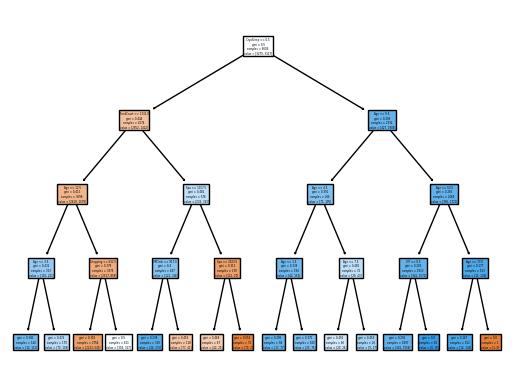

In [11]:
import numpy as np
import pandas as pd
# from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
    
# Data Preprocessing
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv', header=None, encoding='utf-8')
df_train = df_train.dropna(how="any")
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv', encoding='utf-8')
df_test = df_test.fillna(0)
# print(df_train.head(10))
# print(df_test.head(10))

y_train = df_train.iloc[1:, 13].values
y_train = np.where(y_train == 'True', 1, 0)
# print(y)

X_train = df_train.iloc[1:, [2, 5, 6, 7, 8, 9, 10, 11]].values
X_train[:,0] = np.where(X_train[:,0] == 'True', 1, 0)
X_train[:,2] = np.where(X_train[:,2] == 'True', 1, 0)
X_train = np.float_(X_train)
# print(X_train)
# print('Class labels:', np.unique(y_train))

X_test = df_test.iloc[0:, [2, 5, 6, 7, 8, 9, 10, 11]].values
X_test[:,0] = np.where(X_test[:,0] == 'True', 1, 0)
X_test[:,2] = np.where(X_test[:,2] == 'True', 1, 0)
X_test = np.float_(X_test)
# print(X_test)

# Feature Scaling
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

# sklearn-Decision Tree Training
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

# sklearn-Decision Tree Prediction
y_pred = tree_model.predict(X_test)
# print(y_pred)

trans = []
for i in y_pred:
    trans.append(i==1)
submission = np.column_stack((df_test.PassengerId, trans))
print(submission)

df_result = pd.DataFrame(submission)
df_result.to_csv("/kaggle/working/submission.csv", header=['PassengerId', 'Transported'], index=False)

feature_names = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'Shopping', 'Spa', 'VRDeck']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.savefig('TreeFig.pdf')
plt.show()
